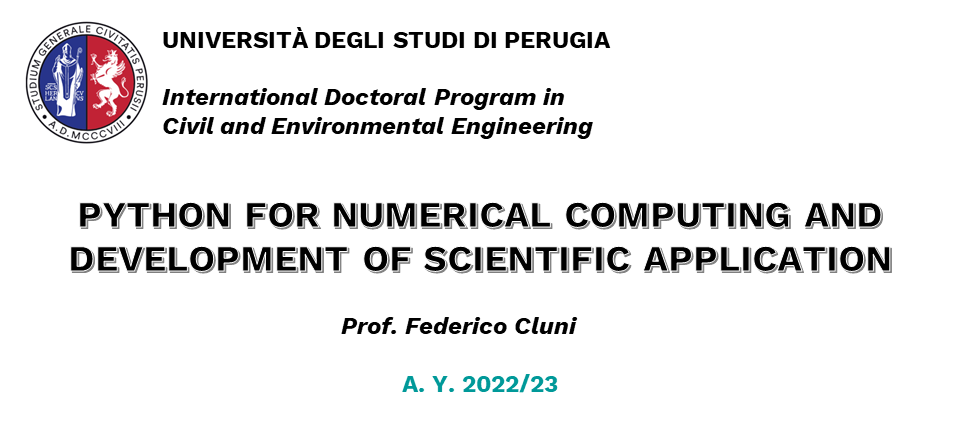

# Lesson #6 - May 10, 2023
<hr>

The examples are adapted from:

R. Johansson, "Numerical Python: Scientific Computing and Data Science Applications With Numpy, Scipy and Matplotlib", Apress, 2018

In [3]:
import numpy as np
import numpy.linalg
import numpy.random as rd
import scipy
from scipy import linalg, optimize, integrate, fft
import matplotlib
import matplotlib.pyplot as plt

# Solution of linear systems

Solve the system of linear equations

$$\left\{ \begin{array}{l} 2x_0 +3x_1 = -4 \\
-x_0 +4x_1 = 2 \end{array}\right.$$

In a matrix form, set

$$A =\left[ \begin{array}{cc} 2 & 3 \\ -1 & 4 \end{array} \right], b =\left[ \begin{array}{c} -4 \\ 2 \end{array} \right]$$

and find

$$ x =\left[ \begin{array}{cc} x_1 \\ x_2 \end{array} \right]$$

so that

$$Ax = b$$

In [35]:
A = np.array([[2,3],[-1,4]])
A

array([[ 2,  3],
       [-1,  4]])

In [3]:
b = np.array([-4,2])
b

array([-4,  2])

In [4]:
x = linalg.solve(A,b)
x

array([-2.,  0.])

Check that $x$ is indeed the solution

In [5]:
A@x - b

array([0., 0.])

## Condition number

The condition number should as small (i.e. close to $1$) as possible, otherwise small changes in $b$ results in large variation in $x$.
If it is small, the system is *well conditionated*.

In [6]:
numpy.linalg.cond(A)

2.2907308206532337

What happens if c.n. is large?

In [36]:
A1 = np.array([[2,3],[4,5.9999]])
numpy.linalg.cond(A1)

324994.00004943175

In [37]:
linalg.solve(A1,[2,4])

array([1., 0.])

In [38]:
linalg.solve(A1,[2.01,4])

array([-298.995,  200.   ])

In [9]:
linalg.solve(A1,A1@np.array([2.01,4]))

array([2.01, 4.  ])

## Norm, rank

In [10]:
numpy.linalg.norm(A)

5.477225575051661

In [11]:
numpy.linalg.matrix_rank(A)

2

# Eigenvalue problem

In several fields (mechanics, 3D vision, ...) it is necessary to solve the following problem:

Given a matrix $A$, find value of a scalar $\lambda$ and a vector $v$ so that

$$ A \, v = \lambda \, v$$

Usually, the solution is not unique, and the correpsonding pair $\lambda$ and $v$ are called eigenvalue and eigenvectors, respectively.

In [32]:
A = np.array([[4.,-3.,0.],[3.,4.,0],[5.,10.,10.]])
L, V = linalg.eig(A)
for i in range(A.shape[0]):
    print(f"\u03bb = {L[i]:16.3f}, [ {V[0,i]:18.5f}, {V[1,i]:18.5f}, {V[2,i]:18.5f}]")

λ =    10.000+0.000j, [   0.00000+0.00000j,   0.00000+0.00000j,   1.00000+0.00000j]
λ =     4.000+3.000j, [  -0.36600-0.27450j,  -0.27450+0.36600j,   0.76249+0.00000j]
λ =     4.000-3.000j, [  -0.36600+0.27450j,  -0.27450-0.36600j,   0.76249-0.00000j]


Note that `L` is an array and `V` is a matrix whose *columns* are the eigenvectors.

A different case

In [28]:
A = np.array([[100.,-30.,0.],[-30.,-200.,0.],[0.,0.,50.]])
L, V = linalg.eig(A)
for i in range(A.shape[0]):
    print(f"\u03bb = {L[i]:16.3f}, [ {V[0,i]:8.5f}, {V[1,i]:8.5f}, {V[2,i]:8.5f}]")

λ =   102.971+0.000j, [  0.99513, -0.09854,  0.00000]
λ =  -202.971+0.000j, [  0.09854,  0.99513,  0.00000]
λ =    50.000+0.000j, [  0.00000,  0.00000,  1.00000]


Note that when the matrix is symmetric with real entries (and so it is Hermitian) the eigenvalues and corresponding eigenvector are real, so `eigh` can be used 

In [18]:
L, V = linalg.eigh(A)
for i in range(A.shape[0]):
    print(f"\u03bb = {L[i]:8.3f}, [ {V[0,i]:8.5f}, {V[1,i]:8.5f}, {V[2,i]:8.5f}]")

λ = -202.971, [  0.09854,  0.99513,  0.00000]
λ =   50.000, [  0.00000,  0.00000,  1.00000]
λ =  102.971, [  0.99513, -0.09854,  0.00000]


# Fast Fourier Transform (FFT)

One of the fundamental tool in signal processing is the *Fast Fourier transform* (FFT).

Givel a sample $x_k$ with $k = 0, 1, \ldots N-1$ than its FFt is 

$ X_k = \sum_{j=0}^{N-1} x_j e^{-2\pi i \frac{kj}{N}}$

Once $F_k$ are known, it is possible to go back to the original sample with the *inverse* FFT (iFFT) as

$ x_k = \sum_{j=0}^{N-1} X_j e^{2\pi i \frac{kj}{N}}$


In [55]:
dt = 0.01
f_Ny = 1/dt/2

T = 3
t = np.arange(0,T,dt)
N = len(t)

#fi = rd.rand(3)*f_Ny
#psi = rd.rand(3)*2*np.pi
#A = rd.rand(3)

fi = [10,15,25]
psi = [np.pi/3, np.pi/2, 3/2*np.pi]
A = [0.5,0.4,0.8]

x = np.zeros(N)
for (fi_,psi_,A_) in zip(fi, psi, A):
    x = x + A_*np.sin(fi_*2*np.pi*t+psi_)
# add some noise
x = x + 0.25*rd.rand(N)
# zero mean
x = x-x.mean()

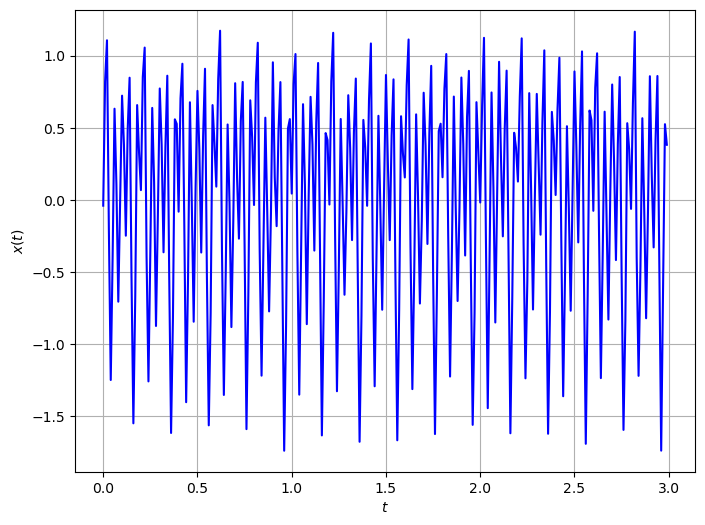

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t,x,'b-')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.grid(True)

In [57]:
X = fft.fft(x)
f = fft.fftfreq(N,dt)

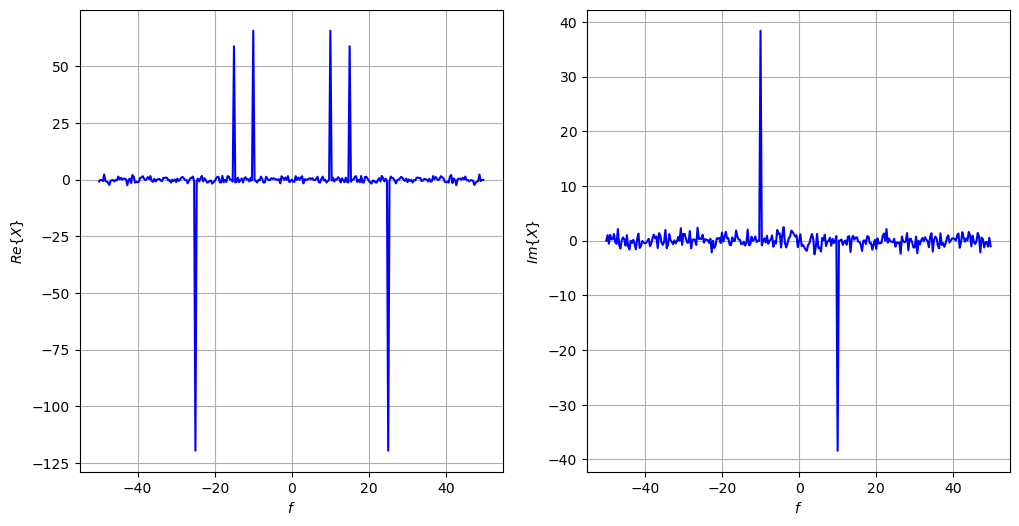

In [58]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(fft.fftshift(f),fft.fftshift(X).real,'b-')
ax[0].set_xlabel('$f$')
ax[0].set_ylabel('$Re\{X\}$')
ax[0].grid(True)
ax[1].plot(fft.fftshift(f),fft.fftshift(X).imag,'b-')
ax[1].set_xlabel('$f$')
ax[1].set_ylabel('$Im\{X\}$')
ax[1].grid(True)

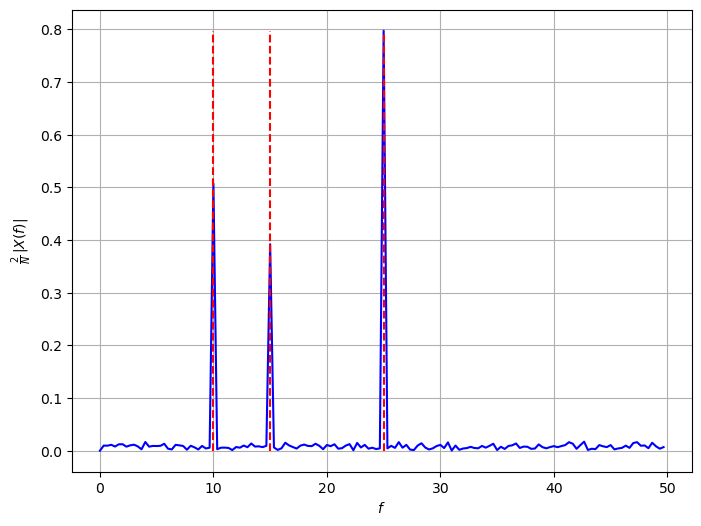

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
Xnorm = 2.0/N*np.abs(X[:N//2])
ax.plot(f[:N//2],Xnorm,'b-')
ax.set_xlabel('$f$')
ax.set_ylabel('$\\frac{2}{N}\,|X(f)|$')
for fi_ in fi:
    ax.plot([fi_,fi_],[0,Xnorm.max()],'r--')
ax.grid(True)

## Parseval identity

Check that

$\sum_{k=0}^{N-1} |x_k|^2 = \sum_{k=0}^{N-1} |X_k|^2$

In [60]:
print(f"\u03a3 |x_\u2096| = {np.sum(x**2):7.3f}")
print(f"\u03a3 |X_\u2096| = {np.sum(np.abs(X)**2)/N:7.3f}")

Σ |x_ₖ| = 158.736
Σ |X_ₖ| = 158.736


## Filter

It is possible to implement a simple filter, for example a low-pass filter wich cuts away all the frequencies greater than 12 Hz.

In [61]:
X_fil = X*(np.abs(f)<12)
x_fil = fft.ifft(X_fil)

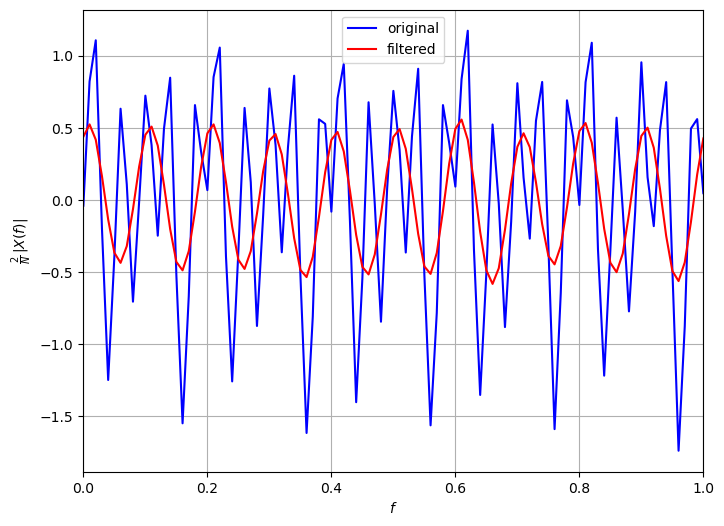

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t,x,'b-',label='original')
ax.plot(t,x_fil,'r-',label='filtered')
ax.set_xlabel('$f$')
ax.set_ylabel('$\\frac{2}{N}\,|X(f)|$')
ax.legend()
ax.set_xlim(0,1)
ax.grid(True)

## Windowing

Remember that, using FFT, we assume that the time serie is *periodic* with period T.

Since this is often not the case, this generates the *spectral leakage*.
To mitigate this phenomeno, it is possible to apply a windowing function, for example a Blackman window.

In [63]:
from scipy.signal import blackman

w = blackman(N)
x_black = x*w
x_black = x_black-x_black.mean()
X_black = fft.fft(x_black)

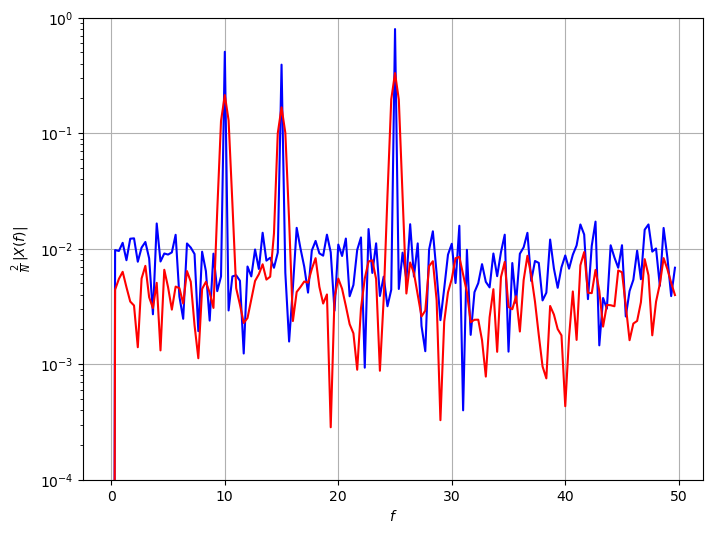

In [64]:
fig, ax = plt.subplots(figsize=(8,6))
X_black_norm = 2.0/N*np.abs(X_black[:N//2])
ax.semilogy(f[:N//2],Xnorm,'b-')
ax.semilogy(f[:N//2],X_black_norm,'r-')
ax.set_xlabel('$f$')
ax.set_ylabel('$\\frac{2}{N}\,|X(f)|$')
ax.set_ylim(10**(-4),1)
ax.grid(True)

# Least squares

Can be useful if our data have and underlying law which depends *linearly* on some parameters, such as:

$$ y(x) = a + b\cdot x + c \cdot x^2$$

In [12]:
x = np.linspace(-1,1,100)
a, b, c = 1, 2, 3
y_exact = a + b*x + c*x**2

Add some noise...

In [13]:
m = 100
X = 1- 2*rd.rand(m)
Y = a + b*X + c*X**2 + rd.randn(m)

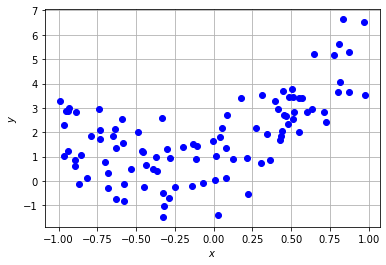

In [14]:
fig, ax = plt.subplots()
ax.plot(X,Y,'bo')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)

The system to solve is this one:

$$\left[ \begin{array}{ccc} 1 & x_0 & x_0^2 \\ 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \ldots \\1 & x_m & x_m^2 \end{array} \right] \left( \begin{array}{c} a \\ b \\ c \end{array} \right) = \left( \begin{array}{c} y_0 \\ y_1 \\ y_2 \\ \ldots \\ y_m\end{array} \right) $$

In [15]:
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = linalg.lstsq(A.T, Y)

In [16]:
sol

array([0.91471154, 1.93138163, 3.14262001])

In [17]:
y_fit = sol[0] + sol[1]*x + sol[2]*x**2
y_exact = a + b*x + c*x**2

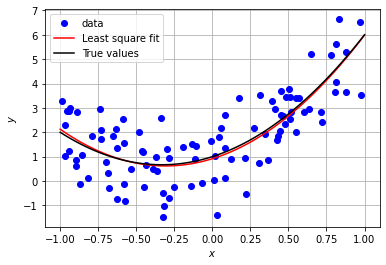

In [18]:
fig, ax = plt.subplots()
ax.plot(X,Y,'bo',label='data')
ax.plot(x, y_fit, 'r', label='Least square fit')
ax.plot(x, y_exact, 'k', label='True values')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)

# Zeros of functions

Find the zero (also named roots) of 

$$ f(x) = e^x -2$$

Note that 

$$ f'(x) = e^x$$

## Bisection method

The possible zeros is bracket by two points where the function has different sign.

In [19]:
f = lambda x: np.exp(x)-2
fprime = lambda x: np.exp(x)

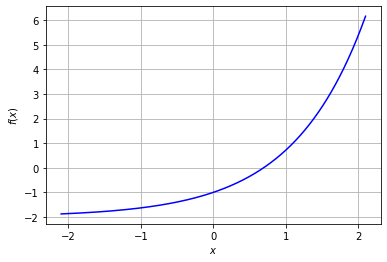

In [20]:
x = np.linspace(-2.1,2.1,1000)
fig, ax = plt.subplots()
ax.plot(x,f(x),'b-')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)

We note that $f(0)$ and $f(1)$ differ in sign and so a zero must be between $0$ and $1$.

In [21]:
f(0)

-1.0

In [22]:
f(1)

0.7182818284590451

In [23]:
x_zero = optimize.bisect(f, 0, 1)

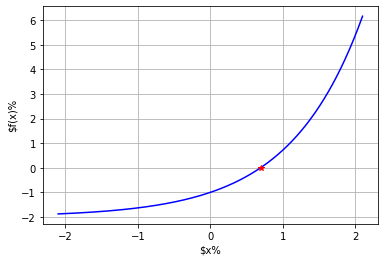

In [24]:
fig, ax = plt.subplots()
ax.plot(x,f(x),'b-')
ax.plot([x_zero],[f(x_zero)],'r*')
ax.set_xlabel('$x%')
ax.set_ylabel('$f(x)%')
ax.grid(True)

## Newton's method

Using a first-order Taylor expansion

$$ f(x+dx) = f(x) + f'(x) dx $$

and, starting from $x$, looking for $dx$ such that $f(x+dx)=0$ allows to **estimate** $dx$ as:

$$ dx = - \frac{f(x)}{f'(x)}$$

In [25]:
optimize.newton(f, 1, fprime=fprime)

0.6931471805599453

The prime derivative can be omitted (it is evaluated numerically)

In [26]:
optimize.newton(f, 1)

0.6931471805599453

## Brent's method

It is an *hybrid* method.

Requires bracketing points with sign change.

In [27]:
optimize.brentq(f, 0, 1)

0.6931471805599453

In [28]:
%pdoc optimize.brentq

# Solving nonlinear system of equations

We have to solve this sytem

$$ \left\{ \begin{array}{l} y - x^3 -2 x^2 +1 = 0 \\
y + x^2 -1 =0 \end{array} \right.$$

Graphically...

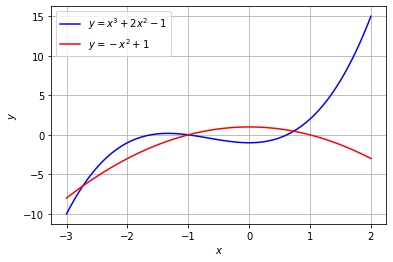

In [29]:
x = np.linspace(-3,2,100)
fig, ax = plt.subplots()
ax.plot(x,x**3+2*x**2-1,'b-', label='$y=x^3+2x^2-1$')
ax.plot(x,1-x**2,'r-',label='$y = -x^2+1$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)

We define a **vector** function in **two variables**: $f:\mathbb{R}^{2} \to \mathbb{R}^2$

$$ f(x) = \left[ \begin{array}{l} f_0(x_0, x_1) \\ f_1(x_0, x_1) \end{array} \right] = \left[ \begin{array}{l} x_1 - x_0^3 -2 x_0^2 +1  \\
x_1 + x_0^2 -1 \end{array} \right] $$

Note that $x_0 = x$ and $x_1=y$.

In [30]:
def f(x):
    return [x[1]-x[0]**3-2*x[0]**2+1, 
           x[1]+x[0]**2-1]

A *guess* value is needed, for example $x = \left[ 1, 0.5 \right]^T$

In [31]:
x_zero = optimize.fsolve(f, [1, 0.5])
x_zero

array([0.73205081, 0.46410162])

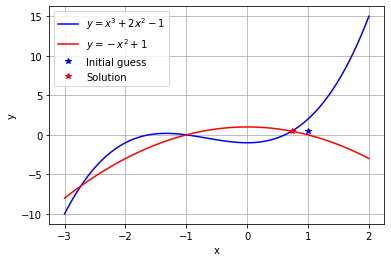

In [32]:
x = np.linspace(-3,2,100)
fig, ax = plt.subplots()
ax.plot(x,x**3+2*x**2-1,'b-', label='$y=x^3+2x^2-1$')
ax.plot(x,1-x**2,'r-',label='$y = -x^2+1$')
ax.plot([1],[0.5],'b*',label='Initial guess')
ax.plot([x_zero[0]],[x_zero[1]],'r*',label='Solution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

In [33]:
%pdoc optimize.fsolve

# Integration

### Integration of a function, given its expression

$$\int_{-1}^{1} e^{-x^2} dx $$

In [34]:
f = lambda x: np.exp(-x**2)

In [35]:
integrate.quad(f, -1, 1)

(1.493648265624854, 1.6582826951881447e-14)

The first element of the tuple is the estimation of the integral, the second element an estimation of the **error**.

Sometimes the function has a singularity.

$$\int_{-1}^{+1} \frac{1}{\sqrt{|x|}} dx$$

In [36]:
f = lambda x: 1./np.sqrt(np.abs(x))

In [37]:
integrate.quad(f, -1, 1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


(nan, nan)

Excluding the point with singulaity do the job.

In [38]:
integrate.quad(f, -1, 1, points=[0])

(3.999999999999999, 1.7319479184152442e-14)

### Integration of a function, given a sample

In [39]:
x = np.linspace(-1,1,200)
y = f(x)

Using the trapezoidal rule (linear interpolation)

In [40]:
integrate.trapz(y, x)

3.8787082658197445

Using the Simpson's rule (quadratic interpolation)

In [41]:
integrate.simps(y, x)

3.8787167470986548